In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.fftpack import fft

!pip install tqdm
from tqdm import tqdm

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [ ]:
# Downloading Train Data from Gdrive
# Metadata : https://drive.google.com/file/d/1qivGPPcVZf-KCdphMDzxRNpD0uRQ250G/view?usp=share_link
# Wave : https://drive.google.com/file/d/1eeG4cyHkQUDmE7-zRYKk6soOlx0MZwM4/view?usp=share_link
# Extract : https://drive.google.com/file/d/16K8Kj-bBOKx-ghaEDqxy7O-Ah-1_VoGt/view?usp=share_link

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qivGPPcVZf-KCdphMDzxRNpD0uRQ250G' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qivGPPcVZf-KCdphMDzxRNpD0uRQ250G" -O metadata.csv && rm -rf /tmp/cookies.txt

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1eeG4cyHkQUDmE7-zRYKk6soOlx0MZwM4' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1eeG4cyHkQUDmE7-zRYKk6soOlx0MZwM4" -O wave.npy && rm -rf /tmp/cookies.txt

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=16K8Kj-bBOKx-ghaEDqxy7O-Ah-1_VoGt' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=16K8Kj-bBOKx-ghaEDqxy7O-Ah-1_VoGt" -O data.csv && rm -rf /tmp/cookies.txt

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-02-18 13:37:47--  https://docs.google.com/uc?export=download&confirm=&id=1qivGPPcVZf-KCdphMDzxRNpD0uRQ250G
Resolving docs.google.com (docs.google.com)... 173.194.210.138, 173.194.210.102, 173.194.210.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.210.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d0elm3op0245ud1dpe7vvm7gts2lm61t/1676727450000/12463189437916965899/*/1qivGPPcVZf-KCdphMDzxRNpD0uRQ250G?e=download&uuid=f391ebc7-dea2-4f14-8fe2-048a6b163eb6 [following]
--2023-02-18 13:37:47--  https://doc-0g-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d0elm3op0245ud1dpe7vvm7gts2lm61t/1676727450000/12463189437916965899/*/1qivGPPcVZf-KCdphMDzxRNpD0uRQ250G?e=download&uuid=f391ebc7-dea2-4f14-8fe2-048a6b163eb6
Reso

In [ ]:
df=pd.read_csv("data.csv")
wave = np.load("wave.npy")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.columns = df.columns.str.replace("'","")
df.columns = df.columns.str.replace(",","")
df.columns = df.columns.str.replace("(","")
df.columns = df.columns.str.replace(")","")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [ ]:
#Melihat data yang hilang
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

In [ ]:
wave_data = df.columns[36:]

In [ ]:
df["label"] = np.where(df["label"]==2,1,df["label"])

In [ ]:
data = df[wave_data]
data["label"] = df["label"]
data = data.dropna().reset_index(drop=True)
#data["source_magnitude"] =  df["source_magnitude"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X=data.drop(columns="label")
y=data["label"]

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

In [ ]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
# fit model no training data
model = XGBClassifier(tree_method='gpu_hist')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.93%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      8010
           1       0.94      0.95      0.95     15697

    accuracy                           0.93     23707
   macro avg       0.92      0.92      0.92     23707
weighted avg       0.93      0.93      0.93     23707



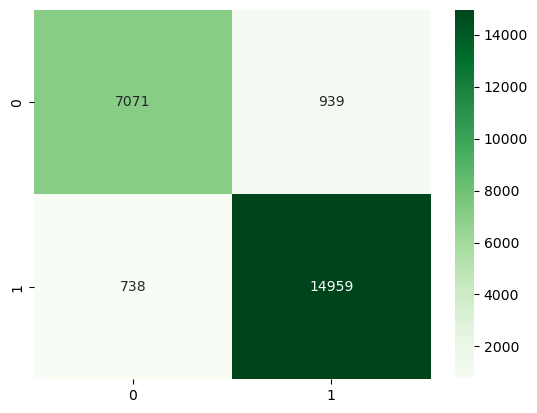

In [ ]:
import seaborn as sns

confusion_mtx = confusion_matrix(y_test, y_pred)

ax = plt.axes()
sns.heatmap(confusion_mtx, annot=True,ax=ax, cmap=plt.cm.Greens,fmt="d")
plt.show()

In [ ]:
!pip install scikit-optimize

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [ ]:
from scipy.stats import randint
from scipy.stats import uniform

# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Metrics
from sklearn.metrics import average_precision_score, roc_auc_score, mean_absolute_error, f1_score, make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt import gp_minimize # Bayesian optimization using Gaussian Processes
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args # decorator to convert a list of parameters to named arguments
from skopt.callbacks import DeadlineStopper # Stop the optimization before running out of a fixed budget of time.
from skopt.callbacks import VerboseCallback # Callback to control the verbosity
from skopt.callbacks import DeltaYStopper # Stop the optimization If the last two positions at which the objective has been evaluated are less than delta

In [ ]:
from time import time

import pprint
"""
A wrapper for measuring time and performances of different optmizers

optimizer = a sklearn or a skopt optimizer
X = the training set
y = our target
title = a string label for the experiment
"""
def report_perf(optimizer, X, y, title, callbacks=None):
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    best_score = optimizer.best_score_
    best_score_std = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start,
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

In [ ]:
# 5-fold StratifiedCV
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)

# Scorer
scorer = make_scorer(f1_score)

# Setting the search space
search_spaces = {'learning_rate': Real(0.01, 1.0, 'uniform'),
                 'max_depth': [5,10,15,20],
                 'min_child_weight': Real(0.1, 1),
                 'subsample': Real(0.1, 1.0, 'uniform'),
                 'colsample_bytree': Real(0.1, 1.0, 'uniform'), # subsample ratio of columns by tree
                 'reg_lambda': [0.001, 0.01, 0.1, 0.5, 1], # L2 regularization
                 'reg_alpha': [0.001, 0.01, 0.1, 1, 10, 100], # L1 regularization
                 'n_estimators': Integer(50, 5000)
   }


opt = BayesSearchCV(XGBClassifier(tree_method='gpu_hist'),
                    search_spaces,
                    scoring='f1',
                    cv=kf,
                    n_jobs=1,
                    n_iter=20,# use just 1 job with CatBoost in order to avoid segmentation fault
                    return_train_score=False,
                    refit=True,
                    verbose=100)

In [ ]:
best_params = report_perf(opt, X, y,'XGBoost',
#best_params = report_perf(opt, trainx, trainy,'CatBoost',
                          callbacks=[DeltaYStopper(0.0001)])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START colsample_bytree=0.7961069431428079, learning_rate=0.3481409218686578, max_depth=10, min_child_weight=0.8408359802738312, n_estimators=3132, reg_alpha=0.1, reg_lambda=0.1, subsample=0.38726596829549087
[CV 1/5; 1/1] END colsample_bytree=0.7961069431428079, learning_rate=0.3481409218686578, max_depth=10, min_child_weight=0.8408359802738312, n_estimators=3132, reg_alpha=0.1, reg_lambda=0.1, subsample=0.38726596829549087;, score=0.946 total time=  20.6s
[CV 2/5; 1/1] START colsample_bytree=0.7961069431428079, learning_rate=0.3481409218686578, max_depth=10, min_child_weight=0.8408359802738312, n_estimators=3132, reg_alpha=0.1, reg_lambda=0.1, subsample=0.38726596829549087
[CV 2/5; 1/1] END colsample_bytree=0.7961069431428079, learning_rate=0.3481409218686578, max_depth=10, min_child_weight=0.8408359802738312, n_estimators=3132, reg_alpha=0.1, reg_lambda=0.1, subsample=0.38726596829549087;, score=0.947 total time

In [ ]:
# XGBoost took 2526.87 seconds,  candidates checked: 20, best CV score: 0.951 ± 0.001
# Best parameters:
# OrderedDict([('colsample_bytree', 0.7725380818586893),
#              ('learning_rate', 0.013432618900805897),
#              ('max_depth', 10),
#              ('min_child_weight', 0.9232642527034975),
#              ('n_estimators', 2025),
#              ('reg_alpha', 10.0),
#              ('reg_lambda', 0.5),
#              ('subsample', 0.9398685603488138)])

In [ ]:
# XGBoost took 2037.31 seconds,  candidates checked: 20, best CV score: 0.964 ± 0.001
# Best parameters:
# OrderedDict([('colsample_bytree', 0.4193194819049936),
#              ('learning_rate', 0.1510032892090281),
#              ('max_depth', 20),
#              ('min_child_weight', 0.7290239791300251),
#              ('n_estimators', 3918),
#              ('reg_alpha', 1.0),
#              ('reg_lambda', 1.0),
#              ('subsample', 0.9232287421877345)])

In [ ]:
# XGBoost took 1739.58 seconds,  candidates checked: 20, best CV score: 0.925 ± 0.002
# Best parameters:
# OrderedDict([('colsample_bytree', 0.34705481105479985),
#              ('learning_rate', 0.26780884171632685),
#              ('max_depth', 10),
#              ('min_child_weight', 0.19522417235374584),
#              ('n_estimators', 4081),
#              ('reg_alpha', 0.1),
#              ('reg_lambda', 0.5),
#              ('subsample', 0.9597295739281722)])

In [ ]:
best_params

OrderedDict([('colsample_bytree', 0.7725380818586893),
             ('learning_rate', 0.013432618900805897),
             ('max_depth', 10),
             ('min_child_weight', 0.9232642527034975),
             ('n_estimators', 2025),
             ('reg_alpha', 10.0),
             ('reg_lambda', 0.5),
             ('subsample', 0.9398685603488138)])